In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 目標函數(損失函數):y=x^2
def func(x): return x ** 2 #np.square(x)

# 目標函數的一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

In [3]:
# 梯度下降
# x_start: x的起始點
# df: 目標函數的一階導數
# epochs: 執行週期
# lr: 學習率
def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # x更新 x_new = x — learning_rate * gradient        
        x += - dx * lr         
        xs[i+1] = x    
    return xs

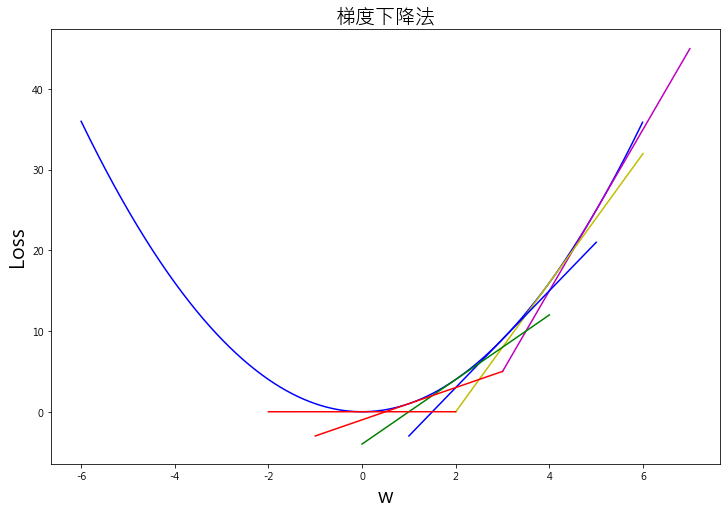

In [5]:
# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 

# 梯度下降法 
w = GD(x_start, dfunc, epochs, lr=lr) 

# 函數 y=x^2 繪圖
plt.figure(figsize=(12,8))
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')

# fix 中文亂碼 
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 正黑體 
plt.rcParams['axes.unicode_minus'] = False # 矯正負號

plt.title('梯度下降法', fontsize=20)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

color = list('rgbymr')  # 切線顏色   
line_offset=2           #切線長度
for i in range(5, -1, -1):
    # 取相近兩個點，畫切線(tangent line)
    z=np.array([i+0.001, i])
    vec=np.vectorize(func)
    cls = np.polyfit(z, vec(z), deg=1)
    p = np.poly1d(cls)
    
    # 畫切線
    x=np.array([i+line_offset, i-line_offset])
    y=np.array([(i+line_offset)*p[1]+p[0], (i-line_offset)*p[1]+p[0]])
    plt.plot(x, y, c=color[i-1])    
plt.show()

# neural network layer

In [1]:
import torch

In [3]:
input = torch.randn(128,20)
input.shape

tensor([[-0.9546,  1.4140, -1.1523,  ..., -0.2271, -0.4607,  1.5491],
        [ 2.2192,  0.4318,  0.0476,  ...,  0.1671, -1.0164,  1.4222],
        [-0.5190, -0.9569,  0.1121,  ...,  0.5642,  0.0211,  1.5475],
        ...,
        [-0.4911,  0.2010,  0.4256,  ...,  1.2682, -1.1641,  0.1610],
        [ 0.4194, -0.4182, -0.5033,  ...,  0.8297, -0.6582, -0.9555],
        [ 0.7086, -0.7117, -1.4676,  ..., -0.4523,  0.0540,  0.9206]])


In [4]:
# 建立神經層 輸入神經元個數 輸出神經元個數 

layer1 = torch.nn.Linear(20,30)

output = layer1(input) #這是執行矩陣內積

output.shape

torch.Size([128, 30])

In [5]:
# 建立Bilinear 神經層
# 矩陣內積 (128, 20) @ (20, 40) + (128, 30) @ (20, 40) = (128, 40)
layer2 = torch.nn.Bilinear(20, 30, 40)
input1 = torch.randn(128, 20)
input2 = torch.randn(128, 30)

#神經層計算

output = layer2(input1,input2)
output.shape

torch.Size([128, 40])